## This is a Loan Prediction Dataset from AV Hackathon
- Here we need to predict the loan status of the customer 
- We'll use the Classification techniqur for this problem

In [1]:
### importing the libraries

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

###  this will prevent the warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
### looking at the data set
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Step 1
### Exploratory Data Analysis

In [5]:
#size of the dataset
print(train.shape)
test.shape

(614, 13)


(367, 12)

In [6]:
###  Save the 'Id' column
train_ID = train['Loan_ID']
test_ID = test['Loan_ID']

###  Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop(['Loan_ID'], 1, inplace = True)
test.drop(['Loan_ID'], 1, inplace = True)

In [7]:
print(train.shape)
test.shape

(614, 12)


(367, 11)

In [8]:
## looking at the training info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.6+ KB


In [9]:
## calculating the count of the null values
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

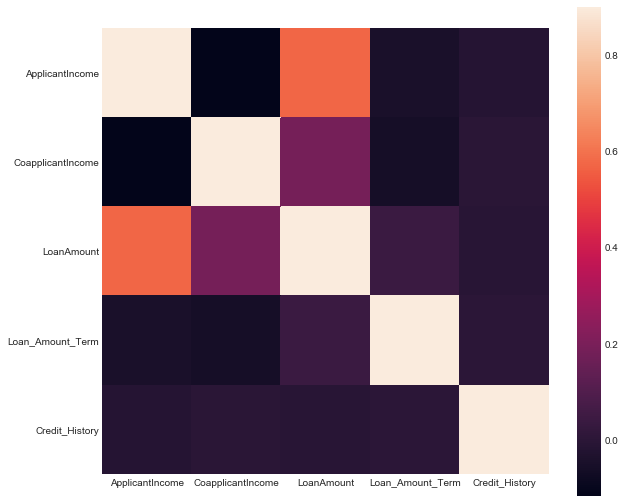

In [10]:
## let's analyze the correlation between the feartures through a heatmap
plt.figure(figsize=(10, 9))
corr = train.corr()
sns.heatmap(corr, square=True, vmax=0.9)

*We basically have two considerable correaltions *<br>
- Loan_Amount_Term - Applicant Income  = 0.6
- Loan_Amount - Applicant Income       = 0.6

### Step 2
### Data Cleaning

In [11]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


####  Outliers

- Applicant's Income

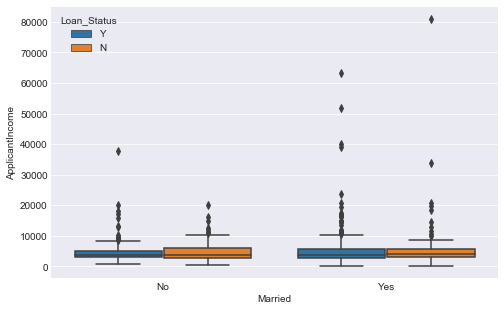

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Married", y="ApplicantIncome", hue='Loan_Status', data=train)

- clearly , there are some of the outliers in the married applicant's income
- We can remove it to present more relative data

In [13]:
###  Removing the outliers
train = train.drop(train[(train['ApplicantIncome']>30000)].index)

- CoApplicantIncome

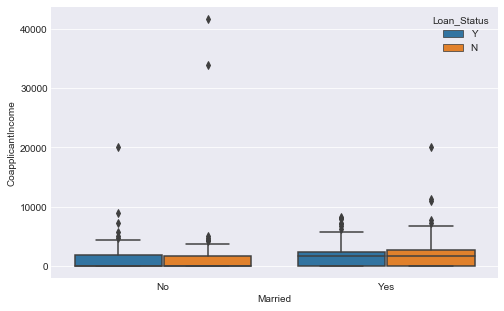

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Married", y="CoapplicantIncome", hue='Loan_Status', data=train)

In [15]:
###  Removing the outliers
train = train.drop(train[(train['CoapplicantIncome']>19000)].index)

#### Joining the train and the test data

In [16]:
n_train = train.shape[0]
n_test = test.shape[0]

###  removing the target variable from the data dataframe
y_train = train.Loan_Status
data = train.append(test)
data.drop(['Loan_Status'], 1, inplace=True)
data.shape

(970, 11)

#### Missing values

In [17]:
## data_na stores the null values of features by %
## data_na is a dataframe only
data_na = (data.isnull().sum() / len(data)) * 100

## dropping the features having 0 null values and sorting them in the decending order
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)

## now we are creating the dataframe analyse the missing ratios
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(10)

,Missing Ratio
Credit_History,8.041237
Self_Employed,5.463918
LoanAmount,2.783505
Dependents,2.577320
Gender,2.371134
Loan_Amount_Term,2.061856
Married,0.309278


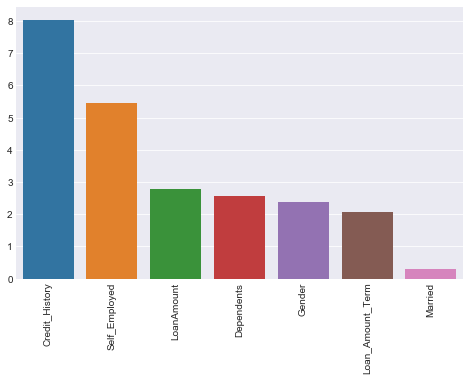

In [18]:
###  let's plot this data
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.barplot(x=data_na.index, y=data_na)

#### Replacing the missing values

- Credit History

In [19]:
data.Credit_History.value_counts(dropna=False)

 1.0    746
 0.0    146
NaN      78
Name: Credit_History, dtype: int64

In [20]:
## 0,1 are classes and hence we'll create nan as a different classes
data.Credit_History.fillna(2, inplace=True)

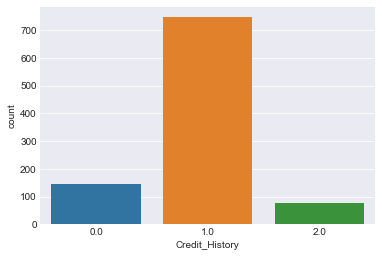

In [21]:
sns.countplot(data=data, x='Credit_History')

- Self Employed

In [22]:
data.Self_Employed.value_counts(dropna=False)

No     800
Yes    117
NaN     53
Name: Self_Employed, dtype: int64

In [23]:
## replacing null with none as to make it seperate rather than merging it
data.Self_Employed.fillna('None', inplace=True)

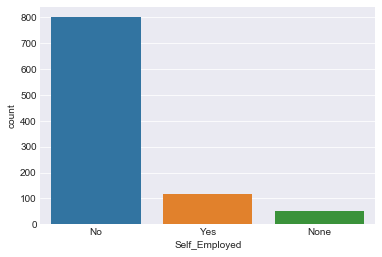

In [24]:
sns.countplot(data=data, x='Self_Employed')

- Loan Amount
- Loan_Amount_Term

In [25]:
## Absence in values means that no loan is provided , hence will impute it with 0
data.LoanAmount.fillna(0, inplace=True)
data.Loan_Amount_Term.fillna(0, inplace=True)

- Dependents

In [26]:
data.Dependents.value_counts(dropna=False)

0      541
2      159
1      158
3+      87
NaN     25
Name: Dependents, dtype: int64

In [27]:
## imputing 3+ with 3 and nan with 4
data.Dependents.replace({'3+':3, np.nan:4}, inplace=True)

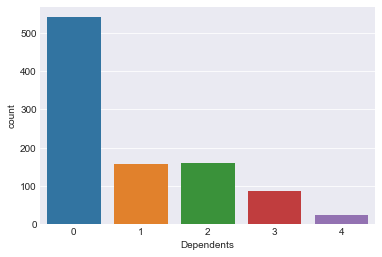

In [28]:
sns.countplot(data=data, x='Dependents')

- Gender
- Married

In [29]:
print(data.Gender.value_counts(dropna=False))
print('----------------------------')
data.Married.value_counts(dropna=False)

Male      766
Female    181
NaN        23
Name: Gender, dtype: int64
----------------------------


Yes    624
No     343
NaN      3
Name: Married, dtype: int64

In [30]:
## As there can be only two genders , we need to impute it with one of the classes
data.Gender.replace({np.nan:'Male'}, inplace=True)
data.Married.replace({np.nan:'Yes'}, inplace=True)

In [31]:
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,0.0,360.0,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,No,Urban,No


*Checking if all the null values are imputed or not*

In [32]:
data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
Credit_History       0
Dependents           0
Education            0
Gender               0
LoanAmount           0
Loan_Amount_Term     0
Married              0
Property_Area        0
Self_Employed        0
dtype: int64

### Step 3
### Feature Engineering

In [33]:
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,0.0,360.0,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,No,Urban,No


#### Label Encoding

In [34]:
cols = ['Education', 'Gender', 'Married', 'Property_Area', 'Self_Employed']

In [35]:
## importing scikit learn library
from sklearn.preprocessing import LabelEncoder

for s in cols:
    lab = LabelEncoder()
    lab.fit(list(data[s].values))
    data[s] = lab.transform(list(data[s].values))

- Adding a new feature having a combination of the Applicant and the Coapplicant Income

In [36]:
data['TotalIncome'] = data.ApplicantIncome + data.CoapplicantIncome

#### Creating dummies for qualitative features

In [37]:
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Married,Property_Area,Self_Employed,TotalIncome
0,5849,0.0,1.0,0,0,1,0.0,360.0,0,2,0,5849.0
1,4583,1508.0,1.0,1,0,1,128.0,360.0,1,0,0,6091.0
2,3000,0.0,1.0,0,0,1,66.0,360.0,1,2,2,3000.0
3,2583,2358.0,1.0,0,1,1,120.0,360.0,1,2,0,4941.0
4,6000,0.0,1.0,0,0,1,141.0,360.0,0,2,0,6000.0


In [38]:
data = pd.get_dummies(data)

In [39]:
## shape of data
data.shape

(970, 16)

In [40]:
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Education,Gender,LoanAmount,Loan_Amount_Term,Married,Property_Area,Self_Employed,TotalIncome,Dependents_3,Dependents_4,Dependents_0,Dependents_1,Dependents_2
0,5849,0.0,1.0,0,1,0.0,360.0,0,2,0,5849.0,0,0,1,0,0
1,4583,1508.0,1.0,0,1,128.0,360.0,1,0,0,6091.0,0,0,0,1,0
2,3000,0.0,1.0,0,1,66.0,360.0,1,2,2,3000.0,0,0,1,0,0
3,2583,2358.0,1.0,1,1,120.0,360.0,1,2,0,4941.0,0,0,1,0,0
4,6000,0.0,1.0,0,1,141.0,360.0,0,2,0,6000.0,0,0,1,0,0


- Refreshing our train and the test data

In [41]:
train = data[:n_train]
test = data[n_train:]

In [42]:
print(train.shape)
print(test.shape)
y_train.shape

(603, 16)
(367, 16)


(603,)

### Step 4 
### Algorithm Selection

In [43]:
## importing the algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## other meaningful modules
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

## cross validation and KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

- we'll create a method to perform cross validation for every model

In [44]:
n_folds = 10

def cross(model):
    kf = KFold(n_folds, shuffle=True, random_state=12)
    scores = (cross_val_score(model, train, y_train, scoring="accuracy", cv = kf))
    return(scores)

### Step 5
### Model Traning

- Logistic Regression

In [45]:
log = LogisticRegression()
result = cross(log)

*cross returns an array of accuracy score across all the folds, thus we take the mean*<br>
*this will be our training accuracy*

In [46]:
result.mean()

0.809207650273224

- Ridge Classifier

In [47]:
ridge = RidgeClassifier()
result = cross(ridge).mean()

- K Neighrest Neighbours

In [48]:
knn = KNeighborsClassifier(n_neighbors=7)
result = cross(knn).mean()
result

0.6501092896174864

- Gaussian Naive Bayes

In [49]:
nb = GaussianNB()
result = cross(nb)
result.mean()

0.7495081967213115

- Descision Tree

In [50]:
tree = DecisionTreeClassifier(max_depth=2)
result = cross(tree).mean()
result

0.8159289617486338

- Random Forest 

In [51]:
forest = RandomForestClassifier(max_depth=3)
result = cross(forest).mean()
result

0.8042349726775957

- Support Vector Macchines

In [52]:
svm = SVC()
result = cross(svm).mean()
result

0.6932513661202185

#### Fitting the data and Making Predictions

In [53]:
## fitting
log.fit(train, y_train)
ridge.fit(train, y_train)
tree.fit(train, y_train)
forest.fit(train, y_train)
svm.fit(train, y_train)

## predicting
log_pred = log.predict(test)
ridge_pred = ridge.predict(test)
tree_pred = tree.predict(test)
forest_pred = forest.predict(test)
svm_pred = svm.predict(test)

In [54]:
## pred shape for eg:- log
log_pred.shape

(367,)

### Step 6
### Submission 

In [55]:
sub = pd.DataFrame()
sub['Loan_ID'] = test_ID

## logistic regression
sub['Loan_Status'] = log_pred
sub.to_csv('log_pred.csv',index=False)

## Ridge Classfier
sub['Loan_Status'] = ridge_pred
sub.to_csv('ridge_pred.csv',index=False)

## Decision Tree
sub['Loan_Status'] = tree_pred
sub.to_csv('tree_pred.csv',index=False)

In [56]:

## Random Forest
sub['Loan_Status'] = forest_pred
sub.to_csv('forest_pred.csv',index=False)


## SVM
sub['Loan_Status'] = svm_pred
sub.to_csv('svm_pred.csv',index=False)


### Hence we complete this dataset by applying the required techniques of machine learning and comapring them based on the accuracy score 
- As this is a hackthon competion dataset we can evaluate the test_data score
- However we found that the decision tree and the forest classifier has produced the best training accuracy, so they are likely to perform well on the test dataset as well !!